#AI VIET NAM

# Pretrained Models

# Image Retrieval

In [ ]:
!gdown 1aZVKTLtWlrQOlLvepLasxy6qFuCl4SJm

Downloading...
From: https://drive.google.com/uc?id=1aZVKTLtWlrQOlLvepLasxy6qFuCl4SJm
To: /content/images_mr.zip
100% 36.5M/36.5M [00:00<00:00, 86.5MB/s]


In [ ]:
!unzip /content/images_mr.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_mr/5415.jpg      
  inflating: images_mr/5416.jpg      
  inflating: images_mr/5417.jpg      
  inflating: images_mr/5418.jpg      
  inflating: images_mr/5419.jpg      
  inflating: images_mr/542.jpg       
  inflating: images_mr/5420.jpg      
  inflating: images_mr/5421.jpg      
  inflating: images_mr/5422.jpg      
  inflating: images_mr/5423.jpg      
  inflating: images_mr/5424.jpg      
  inflating: images_mr/5425.jpg      
  inflating: images_mr/5426.jpg      
  inflating: images_mr/5427.jpg      
  inflating: images_mr/5428.jpg      
  inflating: images_mr/5429.jpg      
  inflating: images_mr/543.jpg       
  inflating: images_mr/5430.jpg      
  inflating: images_mr/5431.jpg      
  inflating: images_mr/5432.jpg      
  inflating: images_mr/5433.jpg      
  inflating: images_mr/5434.jpg      
  inflating: images_mr/5435.jpg      
  inflating: images_mr/5436.jpg      
  inflating: images_mr/5437.jpg      

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms

resnet18_model = models.resnet18(
    weights=models.ResNet18_Weights.IMAGENET1K_V1
)

modules = list(resnet18_model.children())[:-1]
resnet18_model = torch.nn.Sequential(*modules)

resnet18_model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet18_model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    processed_img = transform(img)
    return processed_img

def extract_feature(processed_image):
    input = processed_image.unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = resnet18_model(input)
    return prediction.squeeze().cpu().tolist()

In [ ]:
image_path = "/content/images_mr/0.jpg"

processed_image = preprocess_image(image_path)
image_embedding = extract_feature(processed_image)

In [ ]:
len(image_embedding)

512

In [ ]:
image_embedding[0]

1.2001724243164062

##**Image Retrieval with Vector Database**

In [ ]:
!pip install grpcio==1.49.1 pymilvus==2.3.3

###**Connect a Database**

In [ ]:
# connect database
from pymilvus import MilvusClient, connections

CLUSTER_ENDPOINT = "###"
TOKEN = "###"

connections.connect(
    "default",
    uri=CLUSTER_ENDPOINT,
    token=TOKEN
)

client = MilvusClient(
    uri=CLUSTER_ENDPOINT,
    token=TOKEN
)

DEBUG:pymilvus.milvus_client.milvus_client:Created new connection using: 0ee4e85daa8e4221865d9ba42828918c


###**Create a Collection**

In [ ]:
from pymilvus import Collection, DataType, FieldSchema, CollectionSchema, utility

# create a collection
COLLECTION_NAME = "ResNet18"
check_collection = utility.has_collection(COLLECTION_NAME)
if check_collection:
    drop_result = utility.drop_collection(COLLECTION_NAME)

EMBEDDING_DIM=512
image_id = FieldSchema(
    name="image_id",
    dtype=DataType.INT64,
    is_primary=True,
    description="Image ID"
)

image_embedding = FieldSchema(
    name="image_embedding",
    dtype=DataType.FLOAT_VECTOR,
    dim=EMBEDDING_DIM
)

schema = CollectionSchema(
    fields=[image_id, image_embedding],
    auto_id=False,
    description="Image Retrieval Using ResNet18")

collection = Collection(
    name=COLLECTION_NAME,
    schema=schema
)

In [ ]:
collection

<Collection>:
-------------
<name>: ResNet18
<description>: Image Retrieval Using ResNet18
<schema>: {'auto_id': False, 'description': 'Image Retrieval Using ResNet18', 'fields': [{'name': 'image_id', 'description': 'Image ID', 'type': <DataType.INT64: 5>, 'is_primary': True, 'auto_id': False}, {'name': 'image_embedding', 'description': '', 'type': <DataType.FLOAT_VECTOR: 101>, 'params': {'dim': 512}}]}

###**Insert Entities**

In [ ]:
image_folder = "/content/images_mr"

In [ ]:
sorted([int(image_name.split(".")[0]) for image_name in os.listdir(image_folder)])

In [ ]:
import os
from tqdm import tqdm

from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    processed_img = transform(img)
    return processed_img

def extract_feature(processed_image):
    input = processed_image.unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = resnet18_model(input)
    return prediction.squeeze().cpu().tolist()

# extract feature
image_ids = sorted([
    int(image_name.split(".")[0]) for image_name in os.listdir(image_folder)
])
image_embeddings = []
for file_name in tqdm(image_ids):
    file_name = str(file_name) + ".jpg"
    image_path = os.path.join(image_folder, file_name)
    processed_image = preprocess_image(image_path)
    processed_image = extract_feature(processed_image)
    image_embeddings.append(processed_image)

100%|██████████| 9908/9908 [00:45<00:00, 219.59it/s]


In [ ]:
# insert entities
entities = [image_ids, image_embeddings]
ins_resp = collection.insert(entities)
ins_resp

(insert count: 9908, delete count: 0, upsert count: 0, timestamp: 445730445189447682, success count: 9908, err count: 0)

In [ ]:
collection.flush()

###Indexing

In [ ]:
collection.num_entities

9908

In [ ]:
index_params = {
    "index_type": "IVF_FLAT",
    "metric_type": "L2",
    "params": {}
}
collection.create_index(
    field_name=image_embedding.name,
    index_params=index_params
)

Status(code=0, message=)

In [ ]:
collection.drop_index()

In [ ]:
collection.has_index()

True

###Get Entities

In [ ]:
res = client.get(
        collection_name=COLLECTION_NAME,
        ids=0 # [7, 17]
)
res

[{'image_embedding': [1.2001724,
   1.0686908,
   0.95554864,
   0.918407,
   0.41306078,
   0.336616,
   1.124811,
   0.5731022,
   0.30263752,
   1.370095,
   0.55769295,
   0.9290884,
   0.41008204,
   1.1402785,
   0.09794356,
   0.8033771,
   0.051051717,
   2.2344656,
   0.22213079,
   0.079331286,
   0.032760315,
   0.5506264,
   0.75244457,
   0.5867668,
   0.29443747,
   0.4876721,
   0.1561016,
   1.5118766,
   0.5978559,
   0.0,
   0.8615372,
   0.47426146,
   0.013216869,
   1.1568272,
   0.0011309232,
   0.25036538,
   0.5266281,
   0.4514534,
   2.449311,
   0.010903086,
   0.8759814,
   0.9460649,
   0.088881366,
   2.7259252,
   1.479416,
   1.3653346,
   0.07818074,
   0.18769617,
   0.5973245,
   0.36971638,
   1.3043424,
   0.022481013,
   0.576414,
   0.42472604,
   0.046610616,
   1.0966107,
   0.3499959,
   0.82792085,
   1.2703923,
   0.13318755,
   0.0,
   0.08265322,
   0.7963959,
   0.002406731,
   0.7541144,
   0.15913787,
   0.8937486,
   0.25941855,
   0.40

###Delete Enties

In [ ]:
res = collection.delete(
    "image_id in [7, 17]"
)
res

(insert count: 0, delete count: 2, upsert count: 0, timestamp: 445729001418260481, success count: 0, err count: 0)

In [ ]:
res = client.get(
    collection_name=COLLECTION_NAME,
    ids=7
)
res

[]

###Search

In [ ]:
# load collection
collection.load()

In [ ]:
# search
search_params = {
    "metric_type": "L2",
    "params": {"level": 2}
}
def search_images(image_path, topk=5):
    processed_image = preprocess_image(image_path)
    processed_image = extract_feature(processed_image)
    results = collection.search(
        [processed_image],
        anns_field=image_embedding.name,
        param=search_params,
        limit=topk,
        guarantee_timestamp=1
    )
    return results[0]

In [ ]:
def display_image(image_path):
    image = Image.open(image_path).convert('RGB')
    display(image)

In [ ]:
!gdown 1aZHrliKuLOTtzM6vvLj82lwXT9Vjrsfd
!gdown 1aXGzRXwUsaHJ3a1rYO3k2eC94IHgQ2Cq
!gdown 1aYq8JIJ45bH1D3yT0NaQ09ni7Q9jizZ3

Downloading...
From: https://drive.google.com/uc?id=1aZHrliKuLOTtzM6vvLj82lwXT9Vjrsfd
To: /content/q1.jpg
100% 4.04k/4.04k [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aXGzRXwUsaHJ3a1rYO3k2eC94IHgQ2Cq
To: /content/q3.jpg
100% 3.03k/3.03k [00:00<00:00, 14.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aYq8JIJ45bH1D3yT0NaQ09ni7Q9jizZ3
To: /content/q2.jpg
100% 4.16k/4.16k [00:00<00:00, 21.2MB/s]


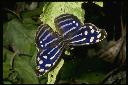

In [ ]:
image_path = "/content/q1.jpg"
display_image(image_path)

In [ ]:
results = search_images(image_path)
results

['id: 20, distance: 0.0, entity: {}', 'id: 31, distance: 167.45379638671875, entity: {}', 'id: 7, distance: 189.0530242919922, entity: {}', 'id: 1123, distance: 192.10971069335938, entity: {}', 'id: 57, distance: 194.97256469726562, entity: {}']

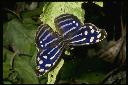

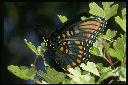

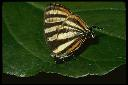

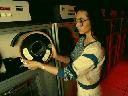

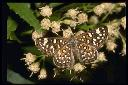

In [ ]:
for result in results:
    display_image(image_folder + "/" + str(result.id) + ".jpg")